# <Fast text를 이용한 유사도 계산>

In [1]:
import gzip

## - 필요한 모듈 import

In [2]:
from gensim import models
ko_model = models.fasttext.load_facebook_model('cc.ko.300.bin.gz')
from sklearn.decomposition import PCA
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from konlpy.tag import Okt
import nltk

## - 새로운 글 & 기존 글(상위 5개) 토큰 사이 유사도 검사 
### 1. 데이터 불러오기

In [3]:
data = pd.read_excel('last_petition_datacrawling.xlsx')[['제목', '청원수', '본문']]
okt = Okt()

delete_word = ['현재', '지금', '상반기', '하반기', '이', '그', '그녀', '저', '것', '들', '제', '저희', '너', '되', '물', '수', '않', '없', '아니',
               '때문', '곳', '등', '들', '중', '좀', '잘', '더', '더욱', '경우', '후', '때', '있', '하', '생각', '청원', '국민청원']

final_token = []
new_final_token = []
df = pd.DataFrame(columns=['청원글', '청원수', '상위토큰', '유사도'])

### 2. 인풋 받기

In [4]:
# 인풋
new_petition = okt.nouns(input("새로 청원할 글을 입력하세요: "))

새로 청원할 글을 입력하세요: 인천국제공항공사는 불공정한 특혜채용을 멈춰주세요. 최근 인천국제공항공사 청원경찰 채용과 관련하여 많은 취준생들과 대학생, 청년들이 분노하며 절망하고 있습니다. 일부 언론이나 정치인들의 주장과 달리 청년들은 결코 비정규직의 정규직화에 분노하는 것이 아닙니다. 많은 이들이 분노하는 진짜 이유는 보안검색 요원들을 정규직화 시키는 과정에서, 1100여명에 달하는 인원이 간단한 인성검사와 면접만을 통해 인천국제공항공사의 정직원이 된다는 사실을 알게 되었기 때문입니다. 또한, 이번에 정규직으로 전환되는 사람의 인원이 기존에 근무하는 사람보다 많다고 합니다.  인국공은 대학생들이 가장 가고 싶어하는 공기업 1순위이고, 인국공에 들어가기 위해 수많은 노력과 시간을 쏟을 정도로 들어가기 쉽지 않은 꿈의 직장이었습니다. 사무 직렬의 경우 토익 만점에 가까워야 고작 서류를 통과할 수 있는 회사에서, 비슷한 스펙을 갖기는 커녕 시험도 없이 그냥 다 전환이 공평한 것인가 의문이 듭니다. 아르바이트 하러 왔다가 최고 인국공에 취직하다니.... 이건 평등이 아닙니다. 역차별이고 청년들에게 더 큰 불행입니다. 무분별한 비정규직의 정규화 당장 그만해야한다고 생각합니다. 이러한 불평등한 사태에 분노를 안할수 없습니다! 비정규직을 정규직으로 전환하는 것은 역차별을 초래하니, 정부와 인천국제공항공사는 불공정한 특혜채용을 제발 멈춰주세요.   무분별한 비정규직의 정규화 당장 그만해야한다고 생각합니다.


### 3. 새로운 청원글 토큰화

In [5]:
# 새로운 청원글 토큰화
new_text = nltk.Text(new_petition)
new_selected_words = [f[0] for f in new_text.vocab().most_common(15)]
print(new_selected_words)

new_final_token = []
# 새로운 청원글 불용어 제거
for word in new_selected_words:
    if word not in delete_word:
        new_final_token.append(word)
print(new_final_token)

new_final_token = new_final_token[:7]


['인천국제공항공사', '비정규직', '정규직', '채용', '청년', '것', '전환', '인국공', '불공정', '특혜', '대학생', '인원', '사람', '역차별', '무분별']
['인천국제공항공사', '비정규직', '정규직', '채용', '청년', '전환', '인국공', '불공정', '특혜', '대학생', '인원', '사람', '역차별', '무분별']


In [6]:
new_final_token

['인천국제공항공사', '비정규직', '정규직', '채용', '청년', '전환', '인국공']

### 4. 기존 청원글 토큰화
### 5. 제목이랑 본문상위토큰 합치기
### 6. 불용어 제거하기 -> 5개 최종 토큰만 추출하여 final_token에 저장
### 7. 새로운 글 & 기존의 청원글과 자카드 유사도 검사

In [7]:
# 3. 기존 청원글 토큰화

# for i in range(10):
for i in range(data['제목'].count()):
    # 제목 토큰
    title_token = okt.nouns(data['제목'][i])
    # 콘텐트 토큰
    content_token = okt.nouns(data['본문'][i])
    text = nltk.Text(content_token)
    # 출현 빈도가 높은 본문 상위 토큰 15개
    selected_words = [f[0] for f in text.vocab().most_common(15)]
    
# 4. 제목이랑 본문상위토큰 15개 합치기
    hap_token = title_token + selected_words
#     print("제목 토큰 & 본문에서 가장 많이 나온 명사 15개: \n", hap_token)
    
# 5. 불용어 제거하기
    for word in hap_token:
        if word not in delete_word:
            final_token.append(word)
            
# 5-2. 불용어 제거한 후, 5개 토큰만 추출
    final_token = final_token[:7]
#     print("불용어 제거한 최종 토큰: \n", final_token)
    

#     print("-" * 50)
    
# 6. 새로운 글 & 기존의 청원글과 자카드 유사도 검사
    def Jaccard_similarity(existing, new):
        # 중복되는 단어 제거
        existing = set(existing)
        new = set(new)
        return len(existing & new) / len(existing | new)

    # 기존의 모든 청원글과 새로운 청원글의 자카드 유사도 출력
#     print('"' + data['제목'][i] + '"' + " 청원글과의 유사도: ", Jaccard_similarity(final_token, new_final_token))
#     print("-" * 50)

    df = df.append({'청원글':data['제목'][i], '청원수': data['청원수'][i], 
                    '상위토큰': final_token, '유사도':Jaccard_similarity(final_token, new_final_token)}, 
                   ignore_index=True)
    final_token = []

### 8. sorting된 순서로 자카드 유사도 가장 높은 상위 5개 글 제시 

In [8]:
sorted_df = df.sort_values(by = ['유사도'], axis = 0, ascending=False, inplace=False)  # 유사도 기준 내림차순으로 정렬
sorted_petition = sorted_df.iloc[:5]  # 상위 5개 글 추출 

# 자카드 유사도가 가장 높은 상위 5개 청원글 출력
print("자카드 유사도가 가장 높은 상위 5개 청원글: \n", sorted_petition)  # 제목과 청원수, 상위토큰, 유사도 나옴.

자카드 유사도가 가장 높은 상위 5개 청원글: 
                                           청원글   청원수  \
29275  인천국제공항공사 비정규직의 무조건적인 정규직 전환. 이게 평등입니까?  9455   
29276                        정규직 전환 진실을 묻습니다.   939   
5573               비정규직 정규직 전환 제도 누구를위한 제도인가?   336   
26212                               정규직 전환 반대     3   
21011      비정규직 전원이 정규직으로 전환이 되었다는 기사에 반박합니다.    13   

                                        상위토큰       유사도  
29275  [인천국제공항공사, 비정규직, 무조건, 정규직, 전환, 평등, 입]  0.400000  
29276       [정규직, 전환, 진실, 정규직, 전환, 보안, 비정규직]  0.333333  
5573          [비정규직, 정규직, 전환, 제도, 누구, 위, 제도]  0.300000  
26212        [정규직, 전환, 반대, 비정규직, 정규직, 월급, 삶]  0.300000  
21011       [비정규직, 전원, 정규직, 전환, 기사, 반박, 정규직]  0.300000  


### 9. 유사도 그래프 

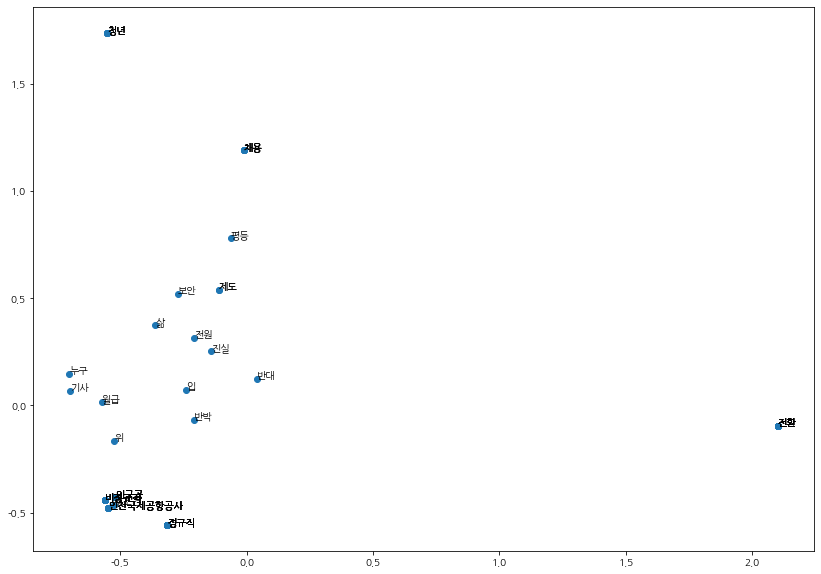

In [9]:
words = []

# 그래프
for i in range(5):
    words += sorted_petition.iloc[i].iloc[2] + new_final_token # 기존 글 다섯개 토큰 + 새로운 글 다섯개 토큰
    
pca = PCA(n_components=2)
xys = pca.fit_transform([ko_model.wv.word_vec(w) for w in words])
xs = xys[:,0]
ys = xys[:,1]

mpl.rcParams['axes.unicode_minus'] = False # 마이너스 부호 깨짐 방지
plt.rc('font', family = 'NanumGothic')   #나눔고딕을 기본 글꼴로 설정
plt.figure(figsize=(14, 10), )
plt.scatter(xs, ys, marker='o')
for i, v in enumerate(words):
    plt.annotate(v, xy=(xs[i], ys[i]))

### 10. 새로운 청원글 & 기존 청원글 상위토큰(단어) 1:1 유사도 검사

In [10]:
# 새로운 청원글의 상위토큰: new_final_token
# 기존 청원글 5개의 상위 토큰: sorted_petition['상위토큰']
prediction = 0
similarity_rate = 0
similarity_rate_hap = 0

In [11]:
for i in range(5):   # 5개의 기존 청원글
    for k in range(5): # 5개의 상위토큰           
        similarity_rate = ko_model.wv.similarity(new_final_token[k], sorted_petition.iloc[i].iloc[2][k]) # 1:1 유사도
        print(similarity_rate)

1.0
1.0
0.0759692
0.40941018
0.20173836
0.33857322
0.20713176
0.11140557
0.40941018
0.20173836
0.27567887
0.6339157
0.3576984
0.36167282
0.19376712
0.33857322
0.20713176
0.10358362
0.25542635
0.24452081
0.27567887
0.16908163
1.0
0.32553723
0.17278478


# <유사도 기반 청원수 예측>

In [12]:
numerator = 0
denominator = 0

for i in range(5):   # 5개의 기존 청원글
    for k in range(5): # 5개의 상위토큰           
        similarity_rate = ko_model.wv.similarity(new_final_token[k], sorted_petition.iloc[i].iloc[2][k]) # 1:1 유사도
        similarity_rate_hap += similarity_rate
    similarity_rate_mean = similarity_rate_hap / 5   # 상위토큰 5개의 유사도 평균
    
    weighted_petition_number = similarity_rate_mean * sorted_petition.iloc[i].iloc[1] # 유사도*청원수
    numerator += weighted_petition_number  # 분자(유사도*청원수 총합)
    denominator += similarity_rate  # 분모(유사도 총합) 
    
final_prediction = numerator/denominator
print("예상 청원수: ", final_prediction)

예상 청원수:  6150.186255344934
